### Network creation for CATS v/s DOGS
#### General Structure
- Image size: 150 x 150
- There will be a stack of alternated Conv2D with relu activation and MaxPooling2D layers, then a Flatten layer and 2 Dense layers in the end.
- The depth of the feature increases from 32 to 128 while the size of feature map (height, width) decreases from 150 x 150 to 7 x 7
- Since it is a binary classification (cat or dog), last layer will be a single unit (Dense, size=1) and a sigmoid activation

In [7]:
# Simple convnet for cats v/s dogs classification
from keras import layers
from keras import models
from keras import backend as K
from keras import optimizers
import numpy as np
import os

In [2]:
# Network Topology
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['accuracy'])

#### Data preprocessing
We format the tensors before feeding them into the neural network
Steps to accomplish here:
* Read the file
* Conver it into floating point tensors
* Rescale the pixel values between 0 and 255

To achieve all this, we will keras ImageDataGenerator pipeline

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# Retrieving all the paths
full_dataset_dir = os.path.join(os.getcwd(), 'kaggle_full_dataset')
base_dataset_dir = os.path.join(os.getcwd(), 'base_dataset')
train_dir = os.path.join(base_dataset_dir, 'train')
validation_dir = os.path.join(base_dataset_dir, 'validation')
test_dir = os.path.join(base_dataset_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [9]:
# Creating the image data generator object for both training and validation.
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=20, 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 89s 891ms/step - loss: 0.6897 - acc: 0.5325 - val_loss: 0.6850 - val_acc: 0.5080
Epoch 2/30
100/100 [==============================] - 88s 883ms/step - loss: 0.6559 - acc: 0.6115 - val_loss: 0.6484 - val_acc: 0.6180
Epoch 3/30
100/100 [==============================] - 88s 885ms/step - loss: 0.6155 - acc: 0.6580 - val_loss: 0.6261 - val_acc: 0.6370
Epoch 4/30
100/100 [==============================] - 89s 887ms/step - loss: 0.5757 - acc: 0.6960 - val_loss: 0.6212 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 88s 884ms/step - loss: 0.5398 - acc: 0.7325 - val_loss: 0.5820 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 88s 883ms/step - loss: 0.5053 - acc: 0.7505 - val_loss: 0.7064 - val_acc: 0.6380
Epoch 7/30
100/100 [==============================] - 88s 885ms/step - loss: 0.4854 - acc: 0.7660 - val_loss: 0.5833 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 8

In [27]:
# Saving the model
model.save('cats_dogs_simple.h5')

In [21]:
import matplotlib.pyplot as plt

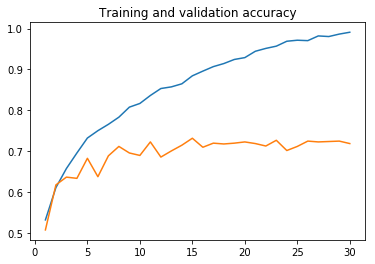

In [22]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.show()

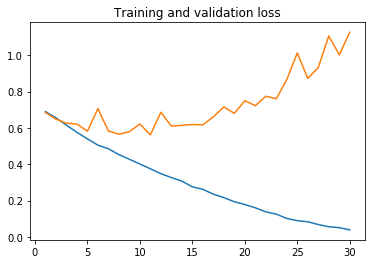

In [24]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Accuracy')
plt.title('Training and validation loss')
plt.show()

ALERT!!!! OVERFITTING

#### End of code